# 0.75 Million Events with latest detector configuration

0.75 million events span runs 300 - 302 **(Tuesday - Friday)**.

Creating the MuonDataFrame Objects and DataFrames.

In [3]:
import os
from MuonDataFrame import *

def compileRun(runNum):
    s1 = "python3 sas_analysis.py junk ../CrateCode/run{}.bin".format(runNum)
    os.system(s1)
    
    
runs = [300,301,302]

for run in runs:
    compileRun(run)

In [2]:
from MuonDataFrame import *

isNew = "False"

f1 = "processed_data/events_data_frame_337.h5"

mdfotest = MuonDataFrame(f1, isNew=isNew, d1="last")

In [4]:
mdfotest.get("SmallCounter")

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

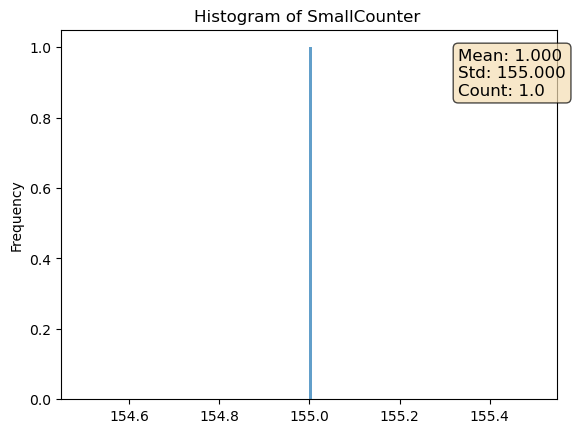

In [3]:
mdfotest.getHistogram("SmallCounter")

In [12]:
from MuonDataFrame import *

isNew = "False"

f1 = "processed_data/events_data_frame_300.h5"
f2 = "processed_data/events_data_frame_301.h5"
f3 = "processed_data/events_data_frame_302.h5"

mdfo0 = MuonDataFrame(f1, isNew=isNew, d1="last")
mdfo1 = MuonDataFrame(f2, isNew=isNew, d1="last")
mdfo2 = MuonDataFrame(f3, isNew=isNew, d1="last")

In [13]:
mdf0 = mdfo0.events_df
mdf1 = mdfo1.events_df
mdf2 = mdfo2.events_df

Creating seperate .csv files

In [7]:
mdfo0.getCompleteCSVOutputFile()
mdfo1.getCompleteCSVOutputFile()
mdfo2.getCompleteCSVOutputFile()

processed_data/events_data_frame_300.csv has been created
processed_data/events_data_frame_301.csv has been created
processed_data/events_data_frame_302.csv has been created


Merging all the runs together and generating a .csv file

In [8]:
mdf_list = [mdf0,mdf1,mdf2]
mdf1M = mdfo0.getMergedMDF(mdf_list)
mdf1M.to_csv("processed_data/run3X.csv", header=True, index=False)

Creating a report pdf for all events combined together.

In [14]:
import copy

mdf_list = [mdf0,mdf1,mdf2]
mdf1M = mdfo0.getMergedMDF(mdf_list)

mdfo1M = copy.copy(mdfo0)
mdfo1M.events_df = mdf1M

In [15]:
mdfo1M.generateAnaReport("run3X.pdf")

Creating the report pdf...
The report file run3X.pdf has been created.


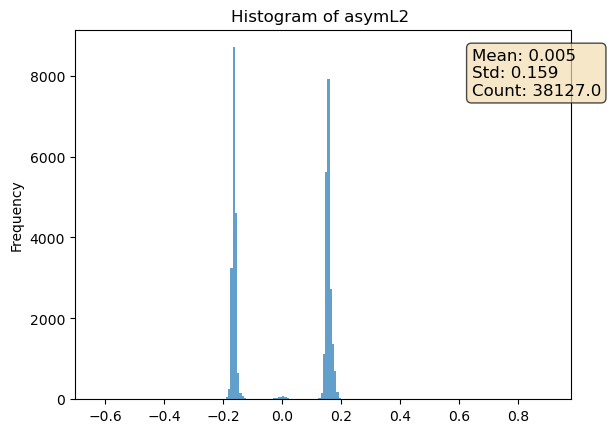

In [24]:
mdfo2.getHistogram("asymL2")

## General Report Observations

1. The shape of the 1D histograms are almost the same across all runs (taken this week and long time before)

## Analysis of Run

### Looking at number of events with multiple TDC Hits

In [5]:
x = mdfo1M.get("TDC")

l = []
for i in x:
    for j in i:
        l.append(len(j))

plt.hist(l)
plt.show()

TypeError: 'NoneType' object is not iterable

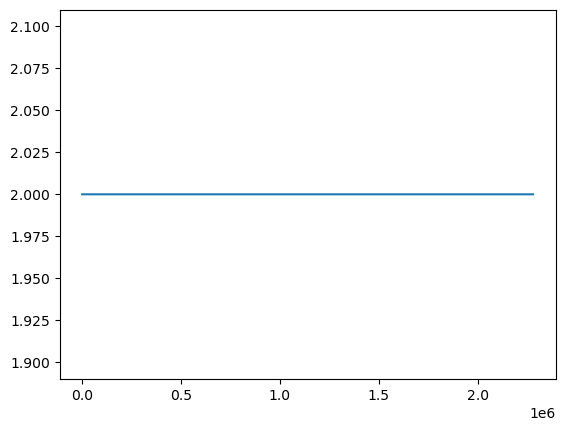

In [22]:
plt.plot([i for i in range(len(l))],l)
plt.show()

### Generating Image of Small Counter

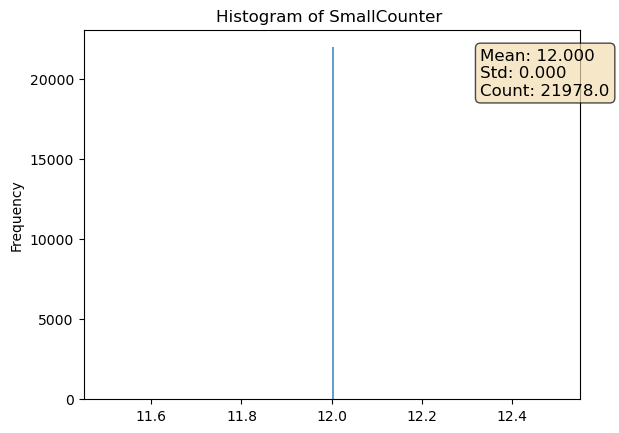

In [15]:
mdfo1M.getHistogram("SmallCounter")

It is really bizarre that we are getting 1 value only.

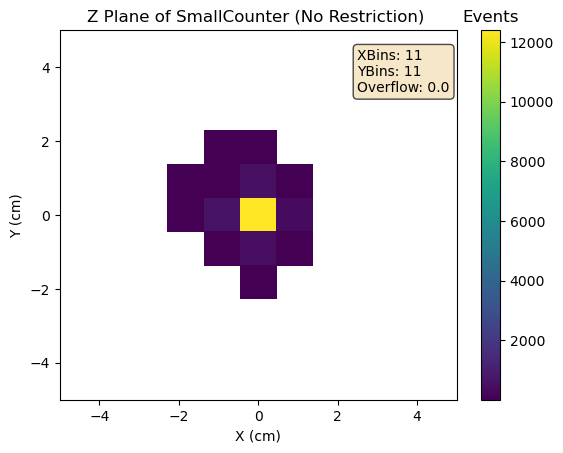

In [63]:
mdfo1M.events_df = mdf1M

mdfo1M.keepEvents("SmallCounter",12,"==")
#mdfo1M.keepEvents("z_angle", 2, "<=")
#mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 11

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter (No Restriction) ",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

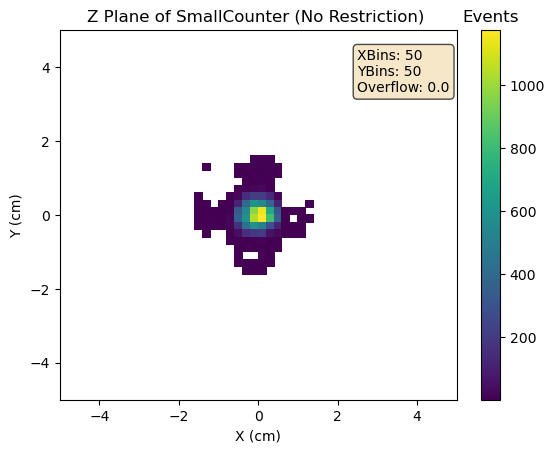

In [64]:
mdfo1M.events_df = mdf1M

mdfo1M.keepEvents("SmallCounter",12,"==")
#mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 50

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter (No Restriction) ",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

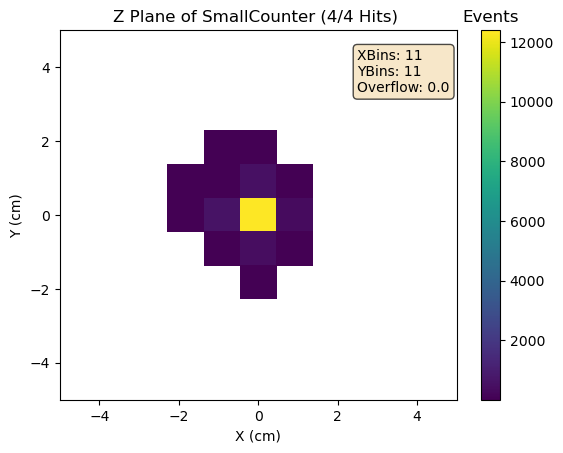

In [65]:
mdfo1M.events_df = mdf1M

mdfo1M.keepEvents("SmallCounter",12,"==")
#mdfo1M.keepEvents("z_angle", 2, "<=")
mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 11

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter (4/4 Hits) ",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

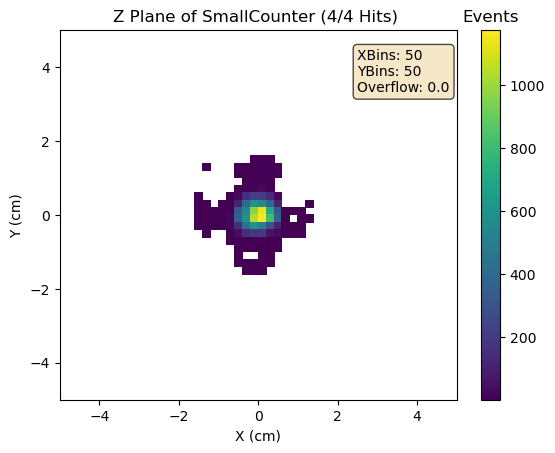

In [66]:
mdfo1M.events_df = mdf1M

mdfo1M.keepEvents("SmallCounter",12,"==")
#mdfo1M.keepEvents("z_angle", 2, "<=")
mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 50

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter (4/4 Hits) ",
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

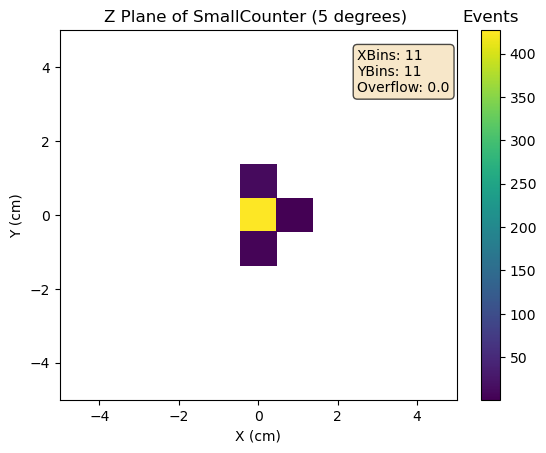

In [69]:
mdfo1M.events_df = mdf1M

angle = 5
mdfo1M.keepEvents("SmallCounter",12,"==")
mdfo1M.keepEvents("z_angle", angle, "<=")
#mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 11

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter ({} degrees) ".format(angle),
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

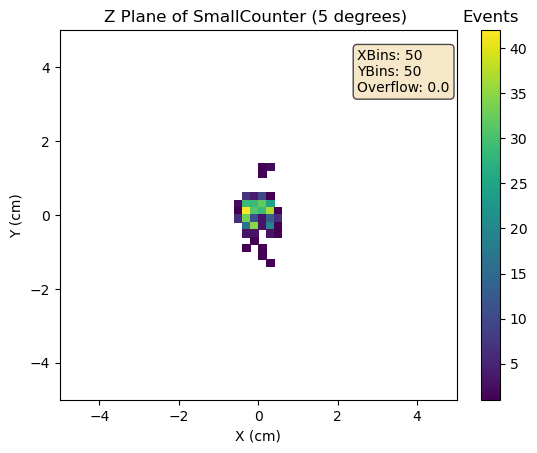

In [70]:
mdfo1M.events_df = mdf1M

angle = 5
mdfo1M.keepEvents("SmallCounter",12,"==")
mdfo1M.keepEvents("z_angle", angle, "<=")
#mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 50

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter ({} degrees) ".format(angle),
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

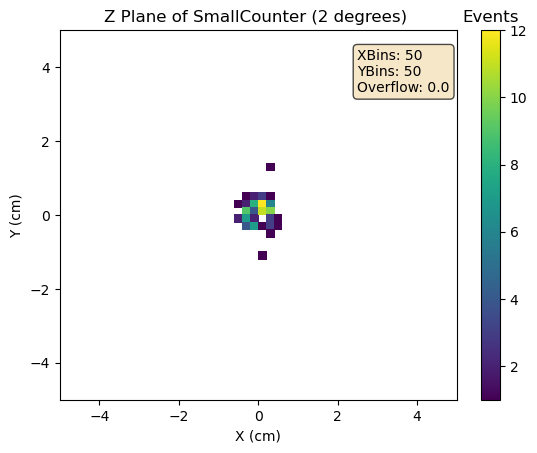

In [74]:
mdfo1M.events_df = mdf1M

angle = 2
mdfo1M.keepEvents("SmallCounter",12,"==")
mdfo1M.keepEvents("z_angle", angle, "<=")
mdfo1M.keep4by4Events()


xmin = -5
xmax = 5
ymin = -5
ymax = 5
bins = 50

t = mdfo1M.getTValue()
xx = getPhysicalUnits(mdfo1M.x(t))
yy = getPhysicalUnits(mdfo1M.y(t))

mdfo1M.get2DHistogram(xx,
                    yy,
                    "Z Plane of SmallCounter ({} degrees) ".format(angle),
                    "X (cm)",
                    "Y (cm)",
                    xmin,
                    xmax,
                    ymin,
                    ymax,
                    nbins=bins,
                    pdf=False,
                    zLog=False)

The projections seem reasonable.

### Fitted Peaks Analysis

Long story short, we need some reasoned decision that is not purely geometrical in order to make the decision of which peaks to discard.

In [80]:
from scipy.signal import find_peaks, peak_prominences

def getPD(term,df,bw):
    df[term].plot.kde(bw_method=bw)
    plt.title(term)
    plt.xlim([-0.25, 0.25])
    plt.show()
    
def getHisto(term,df,bins,bw=0.01):
    df[term].plot.hist(bins=bins, density=True, range=[-0.25, 0.25])
    plt.title(term)
    plt.show()
    
def getNPHist(df, term, bins, range=(-0.25, 0.25)):
    values = df[term]
    hist, bin_edges = np.histogram(values, bins, range=range)
    bin_edges = bin_edges[1:]
    return hist, bin_edges


def getPeaks(x, prmc, wdth):
    peaks, properties = find_peaks(x, prominence=prmc, width=wdth)
    properties["prominences"], properties["widths"]

    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")

    plt.vlines(x=peaks,
           ymin=x[peaks] - properties["prominences"],
           ymax=x[peaks],
           color="C1")

    plt.hlines(y=properties["width_heights"],
           xmin=properties["left_ips"],
           xmax=properties["right_ips"],
           color="C1")
    plt.show()

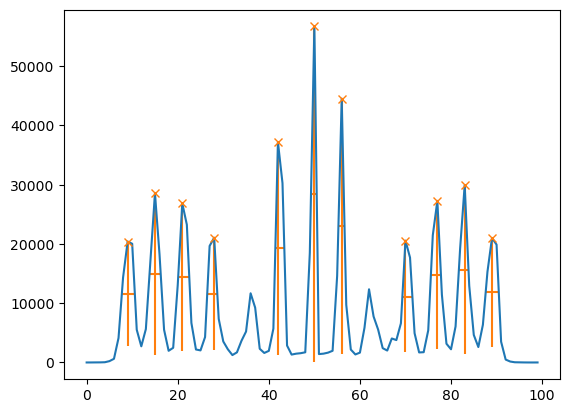

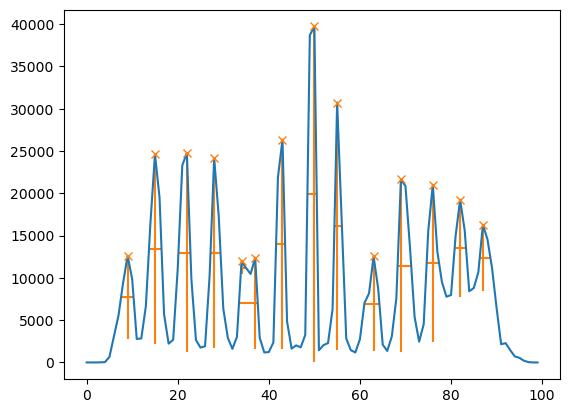

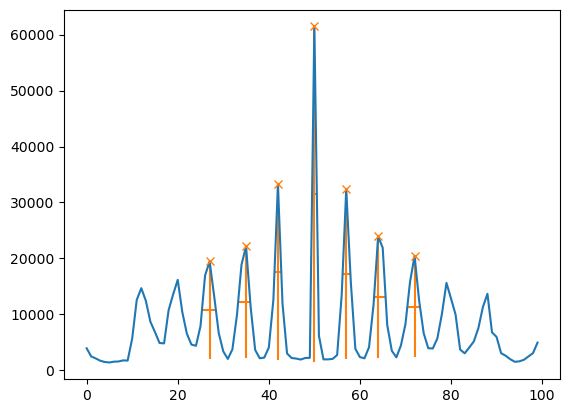

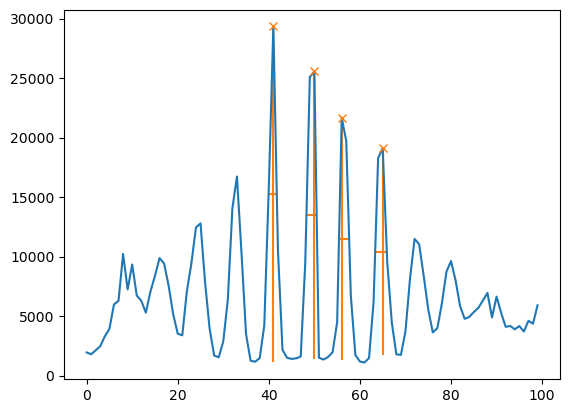

In [97]:
x = getNPHist(mdf1M, "asymL1", 100)[0]
getPeaks(x, 17000, 1)
x = getNPHist(mdf1M, "asymL2", 100)[0]
getPeaks(x, 1300, 1)
x = getNPHist(mdf1M, "asymL3", 100)[0]
getPeaks(x, 17000, 1)
x = getNPHist(mdf1M, "asymL4", 100)[0]
getPeaks(x, 17000, 1)

### Clean Data Analysis

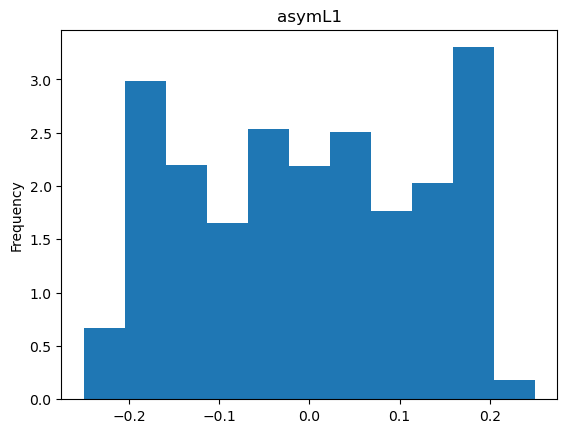

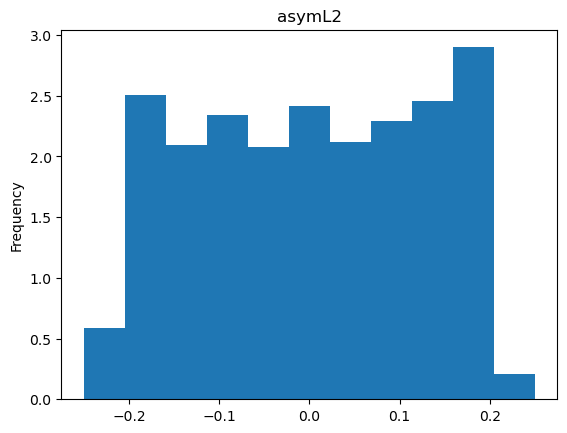

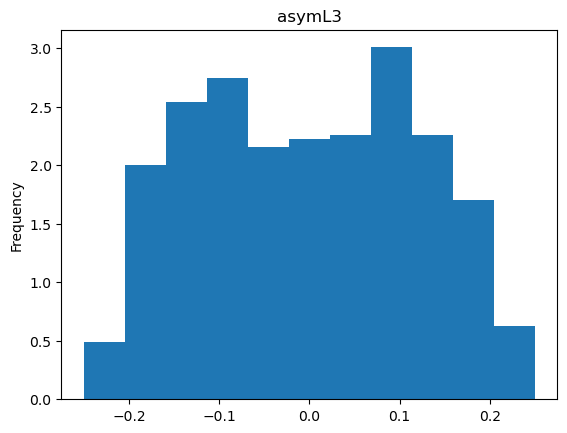

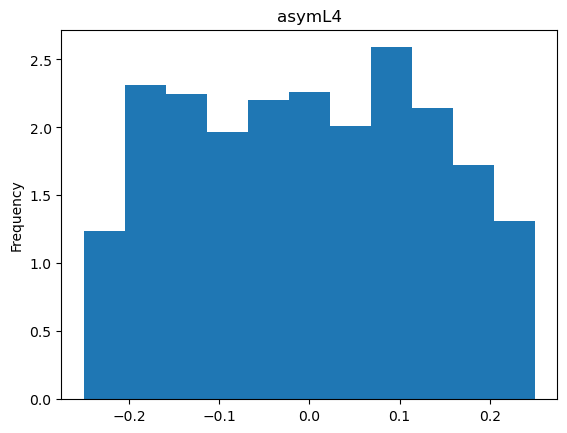

In [88]:
getHisto("asymL1",mdf1M,11)
getHisto("asymL2",mdf1M,11)
getHisto("asymL3",mdf1M,11)
getHisto("asymL4",mdf1M,11)

### Creating a Calibration Table using insights from TDC channels study

Study the tdc_study.ipynb and make a plan for the study in this section. *Take input from Dr. Akchurin*